# PRACTICA 2 - Limpieza y analísis de datos 
## Presentada por Jhon Harry Loaiza y Pablo Jesús Sánchez Vargas
## Tipología y ciclo de vida del dato - Aula 3
### *18 dic 2020*

<a id='top'></a>
### _Contenido_: 
#### 1. <a href='#descripcion'>Descripción del dataset</a>
11. <a href='#importancia'>Importancia del dataset</a>

#### 2. <a href='#integracion'>Integración y selección de los datos de interés</a>

#### 3. <a href='#limpieza'>Limpieza de los datos</a>
31. <a href='#nulos'>¿Los datos contienen ceros o elementos vacíos? ¿Cómo gestionarías cada uno de estos casos?</a>
32. <a href='#outliers'>Identificación y tratamiento de valores extremos</a>

#### 4. <a href='#eda'>Análisis de los datos</a>
41. <a href='#seleccion'>Selección de los grupos de datos que se quieren analizar/comparar (planificación de los análisis a aplicar)</a>
42. <a href='#tests'>Comprobación de la normalidad y homogeneidad de la varianza</a>
43. <a href='#aplicaciones'>Aplicación de pruebas estadísticas para comparar los grupos de datos</a>

#### 5. <a href='#visualizacion'>Visualización de los datos</a>
#### 6. <a href='#ML'>Machine Learning para agrupar en categorias los automóviles</a>
#### 7. <a href='#conclusion'>Conclusión</a>

<a id='descripcion'></a>
### 1. Descripcion del dataset

El conjunto de datos objeto de análisis se llama [*Automobile_data.csv*](https://www.kaggle.com/toramky/automobile-dataset), el cual se ha obtenido en Kaggle y está conformado por 26 columnas y 205 filas, las cuales corresponde a diferentes características que posee un vehículo como el tamaño del motor, la potencia, el número de puertas, etc., y distintos vehículos por fabricante, respectivamente.

Como se indica en la página de Kaggle donde se aloja el dataset, el conjunto de datos corresponde a información que ha sido consolidada de distintas fuentes:

- 1) 1985 Model Import Car and Truck specifications, 1985 Ward's Automotive Yearbook
- 2) Manuales de automóviles personales, Oficina de servicios de seguros, 160 Water Street, Nueva York, NY 10038
- 3) Informe de colisión de seguros, Instituto de seguros para la seguridad en las carreteras, Watergate 600, Washington, DC 20037

La descripción de las variables del dataset es la siguiente:

* **symboling**: índice de riesgo del vehículo en términos de equipamiento de seguridad
* **normalized-losses**: promedio relativo de perdida del pago de un vehículo asegurado anualmente
* **make**: marca del fabricante del vehículo
* **fuel-type**: tipo de combustible
* **aspiration**: tipo de aspiración que posee el motor del vehículo
* **num-of-doors**: número de puertas
* **body-style**: tipo del vehículo
* **drive-wheels**: tipo de tracción en las ruedas del carro
* **engine-location**: ubicación del motor en el vehículo
* **wheel-base**: distancia entre los ejes del vehículo 
* **length**: longitud o largo del vehículo en centímetros
* **width**: ancho del vehículo en centímetros
* **height**: altura del vehículo en centímetros
* **curb-weight**: peso del vehículo
* **engine-type**: tipo de motor del vehículo
* **num-of-cylinders**: número de cilindros del motor
* **engine-size**: tamaño del motor
* **fuel-system**: sistema de combustión del motor
* **bore**: diámetro de los cilindros
* **stroke**: distancia que posee el piston
* **compression-ratio**: índice de compresión del motor
* **horsepower**: potencia del motor (caballos de fuerza)
* **peak-rpm**: revoluciones por minuto del motor
* **city-mpg**: consumo de combustible del vehículo en millas (en ciudad)
* **highway-mpg**: consumo vehículo en millas (en autopista)
* **price**: precio del vehículo en USD

Este dataset en principio podría ser usado para predecir el valor de un vehículo dadas sus características como largo, ancho, el tipo de motor que usa, su rendimiento, el tipo de tracción, entre otras. En nuestro caso, se pretende realizar un analisis de clusters para encontrar los tipos de vehículos que pueden existir en el conjunto de datos, usando solo las variables inherentes al vehículo.

<a id='importancia'></a>
#### 1.1 Importancia del dataset

El objetivo con este dataset es construir a partir de este, un modelo de clustering, con el fin de clasificar los vehículos según sus características y discriminarlos por grupos homogéneos, que permita reconocer y clasificar nuevos vehículos en cada uno de estos segmentos, lo cual también ayudaría a los clientes a tomar una decisión de compra por ejemplo, al conocer ciertas características, podría saber de antemano cual es el vehículo que mejor se ajusta a sus necesidades dados los segmentos generados. El Por lo cual esta clasificación de los vehículos permite a los concesionarios y al cliente tener una mejor perspectiva de lo que se necesita para un vehículo y poder tener una mejor manera de comprar. Además, esto permite también al concesionario conocer las necesidades técnicas de los productos y repuestos que puede necesitar en un momento dado según a qué grupos pertenece, de manera que puede mejorar la logística de mantenimiento empleada en los vehículos que vende optimizándola para satisfacer las necesidades según sus ventas. Para sacarle el máximo partido a este último punto sería conveniente hacer uso de un dataset financiero de cada producto en combinación con los clusters que llevamos a cabo en la práctica.

<a id='integracion'></a>
### 2. Integración y selección de los datos de interés

En este paso procedemos a importar las librerias necesarias para el analisis de los datos ademas de cargar los datos. Se utilizará **Pandas**, para operaciones de carga y transformación de datos.
**Numpy**, para la creación y manipulación de arrays necesarios en el análisis de datos.
**Seaborn y matplotlib**, librerías de visualización de datos y generación de gráficos.
**Scikit-learn** y **Scipy**, para realizar análisis predictivo y **kneed**, expresamente utilizado para identificar el codo de una gráfica, lo cual nos será necesario más adelante en los pasos finales del clustering.

#### Importe de librerias y cargue de los datos

In [1]:
import pandas as pd
pd.options.display.html.table_schema=True

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

plt.style.use('ggplot')

In [2]:
# Cargue de los datos
df = pd.read_csv("Automobile_data.csv")
# Vista previa de los datos
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [3]:
# Dimensión de los datos
print("Dimensiones del dataset:" + str(df.shape))
# Información de los datos
print(df.info())

Dimensiones del dataset:(205, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    objec

En general, los datos han sido cargados correctamente en la definición de la variable, salvo algunas como **price**, **horsepower**, entre otras que deberían aparecer como numéricas y no lo son. Aparecen como "object", lo cual se utiliza para texto o cadenas de caracteres y números, lo cual no es lo más apropiado para las variables indicadas.

Dado que nuestro objetivo es hacer cluster de los vehículos basados en sus características, podemos descartar las variables **symboling** y **normalized-losses**, ya que estas variables tienen que ver más con temas actuariales o de asegurabilidad y no son necesarias para clasificar los vehículos según sus características para el objeto de analisis de los datos. Como se dijo anteriormente, si queremos realizar un análisis financiero necesitaríamos más datos económicos pero nos vamos a centrar en la relación de las partes y características de los vehículos exclusivamente.

In [4]:
#Eliminamos las variables symboling y normalized-losses para limpiar el dataset
df.drop(["symboling","normalized-losses"],axis = 1, inplace = True)

In [5]:
#Comprobamos como ha quedado el dataset
df.head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


<a id='limpieza'></a>
### 3. Limpieza de los datos

<a id='nulos'></a>
#### 3.1. ¿Los datos contienen ceros o elementos vacíos? ¿Cómo gestionarías cada uno de estos casos?

Como se vio en la descripción del dataset, Los tipos de variables son diversos, y se pudo observar que existen algunas variables catalogadas en su tipo de forma incorrecta, por ejemplo en el caso de las variables *price* y *horsepower*, vemos que aparecen unos caracteres **"?"** en algunos registros, lo que indica que en este dataset, los valores nulos han sido marcados con este carácter. Es por esto que probablemente pandas haya catalogado erroneamente como "object" estas variables. Se lleva a cabo una inspección en general por lo que se procede verificar cuantas variables poseen este carácter y corregir así el tipo de dato de las mismas, ya que **"?"** no es apropiado para los análisis y puede inducir a errores en el proceso.

In [6]:
# Seleccionamos las variables categoricas del dataset
df_str = df.select_dtypes(include='object')
df_str.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   make              205 non-null    object
 1   fuel-type         205 non-null    object
 2   aspiration        205 non-null    object
 3   num-of-doors      205 non-null    object
 4   body-style        205 non-null    object
 5   drive-wheels      205 non-null    object
 6   engine-location   205 non-null    object
 7   engine-type       205 non-null    object
 8   num-of-cylinders  205 non-null    object
 9   fuel-system       205 non-null    object
 10  bore              205 non-null    object
 11  stroke            205 non-null    object
 12  horsepower        205 non-null    object
 13  peak-rpm          205 non-null    object
 14  price             205 non-null    object
dtypes: object(15)
memory usage: 24.1+ KB


En este caso se encuentra que, según la definición de las variables, las que tiene errado el tipo de variable son: *horsepower*, *peak-rpm*, *price*, *bore*, *stroke*, y entre las variables que son de tipo categórica pero que poseen el carácter "?" en sus registros, encontramos *num-of-doors*. 

Procedemos ahora a limpiar estas variables y reemplazar los registros faltantes haciendo uso del algoritmo de *regresión Bayesiana Ridge* para el caso de las variables **cuantitativas**, el cual permite realizar una regresión combinando las observaciones de las demás variables del conjunto de datos que acompañan el dato nulo, realizando una regresión ridge (que evita la multicolinealidad, es decir, cuando más de dos variables independientes son una combinación lineal de otras variables independientes de su regresión) y a partir de este, predice el valor del dato nulo de la variable en cuestión.

Utilizamos un algoritmo de *regresión bayesiana Ridge* en vez de una regresión bayesiana normal porque la primera tiene en cuenta todos los pesos de las variables, por pequeñas que sean.

Para la variable *num-of-doors*, imputaremos el valor perdido con la *moda* de la misma variable.

#### Imputación de valores

In [7]:
# Primero se quitan los caracteres "?" y se cambian por nulos

In [8]:
# Forzamos la conversion de las varaibles con el caracter "?" a numericas, para convertirlos estos registros en nulos
df['peak-rpm'] = pd.to_numeric(df['peak-rpm'],errors='coerce')
df['price'] = pd.to_numeric(df['price'],errors='coerce')
df['horsepower'] = pd.to_numeric(df['horsepower'],errors='coerce')
df['horsepower'] = pd.to_numeric(df['horsepower'],errors='coerce')
df['stroke'] = pd.to_numeric(df['stroke'],errors='coerce')
df['bore'] = pd.to_numeric(df['bore'],errors='coerce')

Observamos los campos que poseen valores nulos y el porcentaje que representa este en la variable

In [9]:
prop_perdidos = df.isnull().sum() * 100 / len(df)
valores_perdidos_df = pd.DataFrame({'Variable': df.columns,
                                 '% de perdidos': prop_perdidos})

valores_perdidos_df

,Variable,% de perdidos
make,make,0.00000
fuel-type,fuel-type,0.00000
aspiration,aspiration,0.00000
num-of-doors,num-of-doors,0.00000
body-style,body-style,0.00000
drive-wheels,drive-wheels,0.00000
engine-location,engine-location,0.00000
wheel-base,wheel-base,0.00000
length,length,0.00000
width,width,0.00000


Viendo los resultados, y dado que el porcentaje de valores perdidos en las variables es inferior al 5%, podríamos optar por eliminar los registros sin más y no habría problema alguno en perder representatividad en el conjunto de datos, pero en este caso se prefiere imputar estos datos, para tener la mayor cantidad de información de los vehículos.
Ahora vamos a imputar los valores en las variables numéricas usando **imputación iterativa** basada en algoritmo Bayesian ridge, que posee la libreria *sklearn*. La imputación iterativa es una forma de imputación multivariada que estima las características basadas en las existentes, y es una buena forma de rellenar los valores perdidos de la siguiente manera: en cada paso se toma una columna como el output, es decir, la salida del procesamiento de la imputación, y las demás columnas de características son el "input", es decir, los datos de referencia para la creación de los nuevos datos. Esto se lleva a cabo de manera iterativa hasta que todos los datos son completados.

In [10]:
# Cargamos la libreria
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer

In [11]:
#Escogemos solo las variables numericas para realizar la imputacion
data = df.select_dtypes(include = ["number"])

#guardamos los nombres de las columnas para usarlas posteriormente
lista_cols_num = list(data.columns.values) 

#extraemos el array con los valores de las variables escogidas
data = data.values
data.shape

(205, 14)

In [12]:
#Exploramos el rango de columnas a imputar para crear la lista de valores
ix = [i for i in range(data.shape[1]) if i != 14]
X= data[:, ix]

In [13]:
# Cantidad de valores nulos antes de imputar
print('Datos perdidos antes de imputar: %d' % sum(np.isnan(X).flatten()))

# Establecemos el imputador, por defecto usa el algoritmo BayesianRidge
imputer = IterativeImputer()

# aplicamos el algoritmo a los datos
imputer.fit(X)

# Transformamos el dataset
Xtrans = imputer.transform(X)

# Total de perdidos despues de la imputacion 
print('Datos perdidos despues de imputar: %d' % sum(np.isnan(Xtrans).flatten()))

Datos perdidos antes de imputar: 16
Datos perdidos despues de imputar: 0


Luego de imputar los datos en las variables numéricas, procedemos a convertir el resultado en dataframe y unirlo con las variables categóricas del dataset original.

In [14]:
#Convertimos los valores de las varaibles sin nulos en un dataframe
df_num = pd.DataFrame(Xtrans, columns=lista_cols_num) 

#Extraemos las varaibles categoricas del dataset original
df_str = df.select_dtypes(include = ["object"])

#creamos un nuevo dataset con las variables imputadas y las varaibles categoricas 
df_1 = pd.concat([df_str, df_num], axis=1)
df_1.shape

(205, 24)

Para la variable *num-of-doors* podemos tomar dos opciones, imputar los valores con la moda de la variable o al ser tan pocos registros nulos, podrian eliminarse.... en este caso optamos por la opcion de imputarlos usando la *moda* de la variable, ya que preferimos seguir aplicando el enfoque de priorizar la obtención de datos en lugar de su eliminación.

In [15]:
# calculamos la moda de la variable y reemplazamos el valor nulo con esta
doors_moda = df_1['num-of-doors'].mode() # el resultado es 'four'
df_1['num-of-doors'] = df_1['num-of-doors'].replace('?','four').astype('object')

In [16]:
#comprobamos que ha quedado Ok el cambio
df_1['num-of-doors'].unique()

array(['two', 'four'], dtype=object)

In [17]:
#modificamos el nombre del nuevo dataset para mayor comodidad al momento de trabajar
df = df_1

<a id='outliers'></a>
#### 3.2. Identificación y tratamiento de valores extremos

Un valor extremo implica que se sale de la normalidad del resto de los datos del conjuno. Para identificar si existen valores extremos o atípicos en los datos, usaremos visualizaciones como los boxplots y el criterio del rango intercuartilico para identificar los extremos de las variables numéricas de manera que se obtenga un resultado visible que nos permita apreciar la existencia de estos.

##### Gráfico de boxplot para las variables numéricas

<AxesSubplot:>

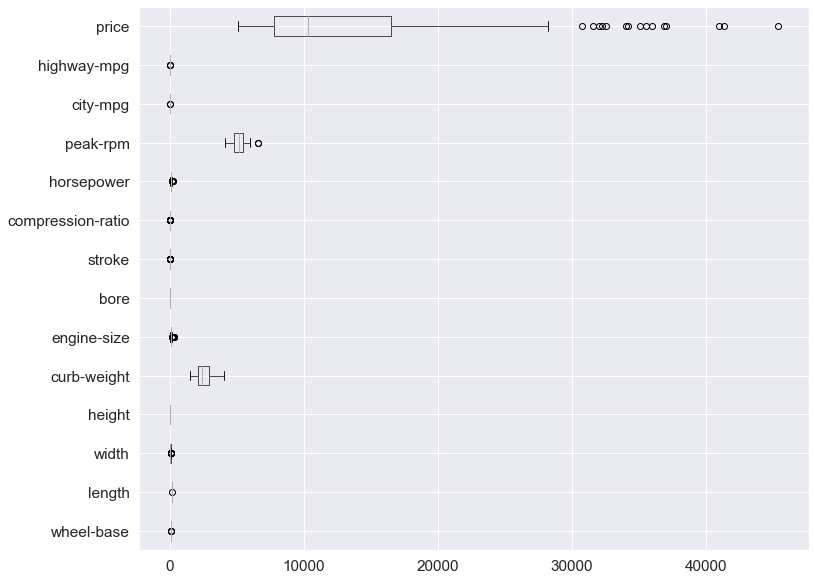

In [18]:
plt.figure(figsize=(12,10))
sns.set(font_scale=1.4)
df.boxplot(vert=False)

Observando el grafico de cajas para las variables numéricas, podría decirse que las variables *price*, *horsepower*, *engine-size* y *peak-rpm* poseen valores por fuera del nivel superior del grafico de cajas (Q3 + 1.5 x IQR), aunque también se advierte que no son muy alejados estos valores, salvo algunos valores de la variable *price*. Pasamos a analizar cada una de estas variables para ver su comportamiento y si estos valores atípicos pueden ser justificados.

#### Variable price

Resulta interesante investigar los datos que arroja esta variable ya que es la única que hemos conservado en el enfoque económico del dataset y puede arrojar mucha información de valor.

In [19]:
#Extraemos los valores que estan por encima o por debajo del limite del diagrama de cajas
Q1 =  df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

df[(df['price'] < Q1-1.5*IQR ) | (df['price'] > Q3+1.5*IQR)]['price']

15     30760.000000
16     41315.000000
17     36880.000000
47     32250.000000
48     35550.000000
49     36000.000000
70     31600.000000
71     34184.000000
72     35056.000000
73     40960.000000
74     45400.000000
126    32528.000000
127    34028.000000
128    37028.000000
129    32006.117178
Name: price, dtype: float64

Revisemos los valores que están iguales o por encima de 32000 USD (el cual aparece como valor atípico anteriormente):

In [20]:
df[df["price"]>=32000].head(10)

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,...,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
16,bmw,gas,std,two,sedan,rwd,front,ohc,six,mpfi,...,3380.0,209.0,3.62,3.39,8.0,182.0,5400.0,16.0,22.0,41315.0
17,bmw,gas,std,four,sedan,rwd,front,ohc,six,mpfi,...,3505.0,209.0,3.62,3.39,8.0,182.0,5400.0,15.0,20.0,36880.0
47,jaguar,gas,std,four,sedan,rwd,front,dohc,six,mpfi,...,4066.0,258.0,3.63,4.17,8.1,176.0,4750.0,15.0,19.0,32250.0
48,jaguar,gas,std,four,sedan,rwd,front,dohc,six,mpfi,...,4066.0,258.0,3.63,4.17,8.1,176.0,4750.0,15.0,19.0,35550.0
49,jaguar,gas,std,two,sedan,rwd,front,ohcv,twelve,mpfi,...,3950.0,326.0,3.54,2.76,11.5,262.0,5000.0,13.0,17.0,36000.0
71,mercedes-benz,gas,std,four,sedan,rwd,front,ohcv,eight,mpfi,...,3740.0,234.0,3.46,3.10,8.3,155.0,4750.0,16.0,18.0,34184.0
72,mercedes-benz,gas,std,two,convertible,rwd,front,ohcv,eight,mpfi,...,3685.0,234.0,3.46,3.10,8.3,155.0,4750.0,16.0,18.0,35056.0
73,mercedes-benz,gas,std,four,sedan,rwd,front,ohcv,eight,mpfi,...,3900.0,308.0,3.80,3.35,8.0,184.0,4500.0,14.0,16.0,40960.0
74,mercedes-benz,gas,std,two,hardtop,rwd,front,ohcv,eight,mpfi,...,3715.0,304.0,3.80,3.35,8.0,184.0,4500.0,14.0,16.0,45400.0
126,porsche,gas,std,two,hardtop,rwd,rear,ohcf,six,mpfi,...,2756.0,194.0,3.74,2.90,9.5,207.0,5900.0,17.0,25.0,32528.0


Como se observa en los datos, al revisar las marcas de estos vehículos con precios superiores al límite superior del complot, vemos que corresponde a fabricantes como Porsche, BMW, Mercedez-Benz o Jaguar, marcas que son reconocidas por construir vehículos de alta gama y que además poseen prestaciones superiores a los autos comunes, como mayor potencia o mayor tamaño de motor, por lo que los valores extremos de esta variable parecen razonables al ser marcas costosas y de renombre en el mercado.

#### Variable engine-size

In [21]:
#Extraemos los valores que estan por encima o por debajo de los limites del diagrama de cajas

Q1 =  df['engine-size'].quantile(0.25)
Q3 = df['engine-size'].quantile(0.75)
IQR = Q3 - Q1

df[(df['engine-size'] < Q1-1.5*IQR ) | (df['engine-size'] > Q3+1.5*IQR)]['engine-size']

15    209.0
16    209.0
17    209.0
47    258.0
48    258.0
49    326.0
71    234.0
72    234.0
73    308.0
74    304.0
Name: engine-size, dtype: float64

Analizamos el valor del tamaño del motor por encima de 300 pulgadas cubicas (4.916 cm cubicos):

In [22]:
df[df["engine-size"]>=300].head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,...,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
49,jaguar,gas,std,two,sedan,rwd,front,ohcv,twelve,mpfi,...,3950.0,326.0,3.54,2.76,11.5,262.0,5000.0,13.0,17.0,36000.0
73,mercedes-benz,gas,std,four,sedan,rwd,front,ohcv,eight,mpfi,...,3900.0,308.0,3.80,3.35,8.0,184.0,4500.0,14.0,16.0,40960.0
74,mercedes-benz,gas,std,two,hardtop,rwd,front,ohcv,eight,mpfi,...,3715.0,304.0,3.80,3.35,8.0,184.0,4500.0,14.0,16.0,45400.0


Apreciando los valores extremos de la variable *engine-size*, los cuales son 3 que superan el valor de 300 pulgadas cubicas, vemos que corresponden a marcas de vehículos importantes, que además poseen valores altos de *peak-rpm* y *compression-ratio*, esto dado por el tamaño del motor y por tener una mayor potencia, los cuales parecen valores razonables en la variable. Se puede observar una relación entre las marcas más caras y aquellas con un tamaño de motor mayor.

#### Variable horsepower

In [23]:
#Extraemos los valores que estan por encima o por debajo del limite del diagrama de cajas

Q1 =  df['horsepower'].quantile(0.25)
Q3 = df['horsepower'].quantile(0.75)
IQR = Q3 - Q1

df[(df['horsepower'] < Q1-1.5*IQR ) | (df['horsepower'] > Q3+1.5*IQR)]['horsepower']

49     262.0
105    200.0
126    207.0
127    207.0
128    207.0
129    288.0
Name: horsepower, dtype: float64

In [24]:
df[df["horsepower"]>=210]

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,...,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
49,jaguar,gas,std,two,sedan,rwd,front,ohcv,twelve,mpfi,...,3950.0,326.0,3.54,2.76,11.5,262.0,5000.0,13.0,17.0,36000.000000
129,porsche,gas,std,two,hatchback,rwd,front,dohcv,eight,mpfi,...,3366.0,203.0,3.94,3.11,10.0,288.0,5750.0,17.0,28.0,32006.117178


Revisando los valores extremos de la variable *horsepower*, se puede ver que los valores están por encima de 210 caballos de fuerza, vemos que corresponden nuevamente a los autos con especificaciones altas y con precios altos, por lo que son perfectamente justificables estos valores en el dataset.

Al observar otros valores de las variables del análisis  con valores extremos, vemos que los valores corresponden a vehículos de altas especificaciones y que por esta razón poseen valores altos de precio, por lo que teniendo en cuenta que el valor de los vehículos muchas veces se da por el mercado y no por las especificaciones como tal, por lo que por este motivo, los valores atípicos encontrados en las variables, no se modificaran para este ejercicio.

In [25]:
# exportamos el dataset limpio y con los valores imputados
df.to_csv (r'C:\Users\PC-79690\Documents\Master UOC\Semestre I\M2.851 - Tipología y ciclo de vida de los datos aula 3\Practica\Practica 2\automobile_data\automobile_data_limpio.csv', index = False, header=True)

<a id='eda'></a>
### 4. Análisis de los datos

<a id='seleccion'></a>
#### 4.1 Selección de los grupos de datos que se quieren analizar/comparar (planificación de los análisis a aplicar)

En esta sección creamos los grupos necesarios para realizar los contrastes de hipótesis pertinentes, para nuestro caso nos interesa conocer **si existe normalidad en las variables continuas del dataset**, además de plantearnos dos preguntas de investigación, bajo la cuales se conforman los grupos de interés a estudiar, las cuales son: 

**1. ¿los motores turbo aspirados poseen un tamaño diferente que el de los motores aspirados convencionalmente?**

**2. ¿los motores con combustible Diesel poseen mayor potencia (caballos de fuerza) que los motores que usan gasolina?**

Creamos los grupos de comparacion para las preguntas anteriormente planteadas

In [26]:
# creamos los grupos de contraste basados en la aspiracion del motor y el tamaño del mismo
turbo_mot = df.query('aspiration == "turbo"')['engine-size']
estandar_mot = df.query('aspiration == "std"')['engine-size']

# creamos los grupos de contraste basados en la potencia del motor y el tipo de combustible que utiliza
df_new = df.rename(columns={'fuel-type': 'fuel_type'}) #modificamos el nombre de la variable para usar query 

diesel_mot = df_new.query('fuel_type == "diesel"')['horsepower']
gasolina_mot = df_new.query('fuel_type == "gas"')['horsepower']

<a id='tests'></a>
#### 4.2 Comprobación de la normalidad y homogeneidad de la varianza

##### Normalidad de las variables continuas del dataset

Se plantea entonces conocer si las variables continuas del dataset se distribuyen de manera normal, para esto se usara la libreria **Scipy** y la **prueba de normalidad de Anderson-Darling**, la cual es una prueba mejorada de la Kolmogorov que permite detectar la distribución de los datos, incluso distintas a la normal. Se basa en comparar la distribución de probabilidad acumulada proveniente de los datos con la teórica correspondiente a una distribución normal o gaussiana, lo cual sería la hipótesis nula del experimento estadístico.

In [27]:
from scipy.stats import anderson

#creamos una lista con los campos que deseamos contrastar
numericas = ["wheel-base","length","width","height","curb-weight",
             "engine-size","bore","stroke","compression-ratio","horsepower",
             "peak-rpm","city-mpg","highway-mpg","price"]

#construimos una funcion para evaluar el test de anderson-darling para cada variable numerica y la significancia del mismo
for cols in numericas:
    result = anderson(df[cols],'norm')
    print('*' + cols +': Statistic: %.30f' % result.statistic)
    p = 0
    for i in range(len(result.critical_values)):
        sl, cv = result.significance_level[i], result.critical_values[i]
        if result.statistic < result.critical_values[i]:
            print('  %.3f: %.3f, La muestra parece Gaussiana o Normal (no se rechaza la hipótesis)' % (sl, cv))
        else:
            print('  %.3f: %.3f, La muestra no parece Gaussiana o Normal(se rechaza la hipótesis)' % (sl, cv))


*wheel-base: Statistic: 6.921692783529579173773527145386
  15.000: 0.565, La muestra no parece Gaussiana o Normal(se rechaza la hipótesis)
  10.000: 0.644, La muestra no parece Gaussiana o Normal(se rechaza la hipótesis)
  5.000: 0.772, La muestra no parece Gaussiana o Normal(se rechaza la hipótesis)
  2.500: 0.901, La muestra no parece Gaussiana o Normal(se rechaza la hipótesis)
  1.000: 1.072, La muestra no parece Gaussiana o Normal(se rechaza la hipótesis)
*length: Statistic: 1.532218470049258485232712700963
  15.000: 0.565, La muestra no parece Gaussiana o Normal(se rechaza la hipótesis)
  10.000: 0.644, La muestra no parece Gaussiana o Normal(se rechaza la hipótesis)
  5.000: 0.772, La muestra no parece Gaussiana o Normal(se rechaza la hipótesis)
  2.500: 0.901, La muestra no parece Gaussiana o Normal(se rechaza la hipótesis)
  1.000: 1.072, La muestra no parece Gaussiana o Normal(se rechaza la hipótesis)
*width: Statistic: 5.026283992747892170882550999522
  15.000: 0.565, La mues

Como se aprecia en los resultados, comparando con diversos niveles de significancia de la prueba (15%, 10%, 5%, 2.5% y 1%), la distribución de las variables numéricas del dataset no muestran normalidad como tal, por lo que se sugiere hacer un escalamiento O Transformación de las variables antes de llevar a cabo un método de machine learning, que en nuestro caso es de clustering.

<a id='aplicaciones'></a>
#### 4.3 Aplicación de pruebas estadísticas para comparar los grupos de datos

#### Contraste de hipótesis sobre el tamaño de un motor turbo frente a un motor estandar

Para este caso, se realiza la pregunta de interés: **los motores turbo aspirados poseen un tamaño diferente que el de los motores estándar?**

Para resolver esta hipótesis de investigación, utilizaran las variables **engine-size** y **aspiration**, utilizando un contraste de hipótesis sobre el promedio de ambos grupos de datos, que se desarrolla usando una prueba t-student o **t-test**, que permite comparar si dos grupos de datos poseen diferencia significativa en sus medias. Se utiliza este contraste ya que no conocemos la varianza poblacional del tamaño del motor frente al tipo de aspiración del mismo.

Antes de realizar el t-test de contraste de hipótesis, se comprueba si las varianzas de las dos poblaciones son homogéneas o no, utilizando el **test de Levene**, esto permite llevar a cabo el contraste de medias con un mejor performance, ya que si las varianzas no son homogéneas y se asume en el t-test, puede llevar a rechazar la hipótesis nula de manera equivocada

##### Test de Levene para homogeneidad de varianzas Engine-Size y Aspiration

In [28]:
### Test de homogeneidad de varianzas de Levene para tamaño de motor y tipo de aspiracion
from scipy.stats import levene

# realizamos el contraste de Levene con los dos grupos
stat, p = levene(turbo_mot,estandar_mot)

print("p-value",p) 
if p <0.05:
      print("Se rechaza la hipotesis nula")
else:
      print("Se acepta la hipotesis nula")

p-value 0.3713303912774516
Se acepta la hipotesis nula


Dado que el contraste de Levene muestra un p-valor de 0.37, el cual es mucho mayor a 0.05, se concluye que las varianzas del tamaño de los motores turbo frente al tamaño de los motores estándar son homogéneas. Por lo tanto el contraste t-test se realizara asumiendo varianzas homogéneas y será de tipo bilateral.

Procedemos ahora a plantear el contraste de hipótesis para el tamaño de los motores turbo frente al tamaño de los motores estándar.

##### T-Test para comparación de medias para Engine-Size y Aspiration

Las hipótesis a contrastar son:

**H0:** El tamaño de los motores turbo aspirados es igual al tamaño de los motores aspirados convencionalmente  
**H1:** El tamaño de los motores turbo aspirados es diferente al tamaño de los motores aspirados convencionalmente 

Las hipótesis a contrastar son:

$H_{0}: \mu_1 = \mu_2$ 

$H_{1}: \mu_1 \neq\ \mu_2$ 

Donde $\mu_1$ es la media del tamaño de motor de los autos turbo aspirados y $\mu_2$ es la media del tamaño de motor de los autos aspirados estandar.

In [29]:
# contraste de medias para el tamaño de motor y tipo de aspiración
from scipy.stats import ttest_ind

# Calculamos la media y la desviacion para los dos grupos
turbo_mot_media = round(turbo_mot.mean(),1)
turbo_mot_desv = round(turbo_mot.std(),1)

estandar_mot_media = round(estandar_mot.mean(),1)
estandar_mot_desv = round(estandar_mot.std(),1)

print("Media tamaño motor turbo:",turbo_mot_media)
print("Desviación tamaño motor turbo:",turbo_mot_desv)

print("Media tamaño motor estandar:",estandar_mot_media)
print("Desviación tamaño motor estandar:",estandar_mot_desv)

# Calculamos el estadistico de contraste

ttest,pval = ttest_ind(turbo_mot, estandar_mot, axis=0, equal_var=True)

print("p-value",pval) 
if pval <0.05:
      print("Se rechaza la hipotesis nula")
else:
      print("Se acepta la hipotesis nula")

Media tamaño motor turbo: 136.5
Desviación tamaño motor turbo: 27.5
Media tamaño motor estandar: 124.8
Desviación tamaño motor estandar: 43.9
p-value 0.12246668788626881
Se acepta la hipotesis nula


Dados los resultados del contraste, podemos decir que no existe diferencia significativa en el tamaño de un motor turbo aspirado frente al tamaño de un motor aspirado convencionalmente, con un nivel de confianza del 95%.

#### Contraste de hipótesis sobre la potencia del motor y el tipo de combustible que usan

Para este caso, se realiza la pregunta de interés: **los motores con combustible Diesel poseen mayor potencia (caballos de fuerza) que los motores que usan gasolina?**

Al igual que resolvimos la pregunta anterior, se realizara un contraste t-test, usando las variables **horsepower** y **fuel-type**, en el cual se configurara como un contraste de una cola (mayor que) y se hará una verificación antes de la homogeneidad de las varianzas en los grupos de interés, usando el test de Levene.

In [30]:
### Test de homogeneidad de varianzas de Levene para tamaño de motor y tipo de aspiracion

df_new = df.rename(columns={'fuel-type': 'fuel_type'})

# realizamos el contraste de Levene con los dos grupos
stat, p = levene(diesel_mot,gasolina_mot)

print("p-value",p) 
if p <0.05:
      print("Se rechaza la hipotesis nula")
else:
      print("Se acepta la hipotesis nula")
      

p-value 0.26003936346156564
Se acepta la hipotesis nula


El contraste no muestra heterogeneidad en las varianzas de los grupos de comparación.

Procedemos ahora a plantear el contraste de hipotesis para determinar si la potencia de los motores diesel es mayor al de los motores a gasolina.

##### T-Test para comparación de medias de Horsepower y Tipo combustible

Las hipótesis a contrastar son:

**H0:** La potencia de los motores diesel es igual a la potencia de los motores a gasolina  
**H1:** La potencia de los motores diesel es superior a la potencia de los motores a gasolina 

En notacion Estadistica, las hipótesis son

$H_{0}: \mu_1 = \mu_2$ 

$H_{1}: \mu_1 \ > \ \mu_2$ 

Donde $\mu_1$ es la media de potencia de motores a Diesel y $\mu_2$ es la media de potencia de motores a Gasolina.

In [31]:
# Calculamos la media y la desviacion para los dos grupos
diesel_mot_media = round(diesel_mot.mean(),1)
diesel_mot_desv = round(diesel_mot.std(),1)

gasolina_mot_media = round(gasolina_mot.mean(),1)
gasolina_mot_desv = round(gasolina_mot.std(),1)

print("Media potencia motor Diesel:",diesel_mot_media)
print("Desviación potencia motor Diesel:",diesel_mot_desv)

print("Media potencia motor Gasolina:",gasolina_mot_media)
print("Desviación potencia motor Gasolina:",gasolina_mot_desv)

# Calculamos el estadistico de contraste

ttest,pval = ttest_ind(diesel_mot, gasolina_mot, axis=0, equal_var=True)

# ya que el comando ttest_ind genera unicamente el pvalor para un contraste de dos colas, 
# se calcula el de una sola cola a partir de este

pval_unacola = 1-pval/2

print("p-value",pval_unacola) 
if pval_unacola <0.05:
      print("Se rechaza la hipotesis nula")
else:
      print("Se acepta la hipotesis nula")


Media potencia motor Diesel: 84.5
Desviación potencia motor Diesel: 26.0
Media potencia motor Gasolina: 106.5
Desviación potencia motor Gasolina: 40.2
p-value 0.9912693030502611
Se acepta la hipotesis nula


Dado el resultado del contraste de hipótesis, se determina que no existe evidencia significativa de que la potencia del motor diesel sea mayor a la de un motor a gasolina.

<a id='#visualizacion'></a>
### 5. Visualización de los datos

Para el caso de visualizar los datos, se revisara la distribución de las variables continuas y su posible relación entre ellas, además de visualizar esta información respecto a las variables categóricas.

#### Histogramas y gráficos de distribución

Para los gráficos y visualizaciones, partiremos analizando las variables continuas, observando la correlación existente entre estas, esto con el fin de hacer transformaciones o hacer ajustes en caso de ser necesario.

Evaluaremos en primera instancia la matriz de correlaciones de las variables numéricas, para esto se usara la correlación de *spearman*, esta se escoge debido a que es un contraste no paramétrico, apropiado para el caso dado que algunas variables no se distribuyen de manera normal. La metodologia de la correlación de **Spearman** con siste en ordenar los datos y asignarles un nuevo valor según su orden. Se procede a construir la matriz de correlaciones.

In [32]:
#calculamos la correlación de las variables
correlation_df = df.corr(method='spearman')

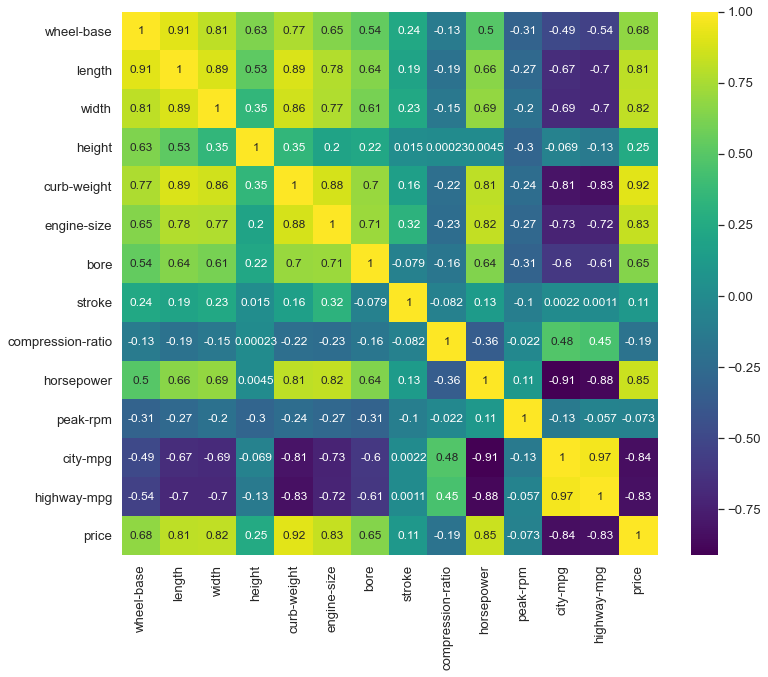

In [33]:
# Mapa de correlaciones para las variables continuas
#sns.set_theme(style="ticks")
plt.figure(figsize=( 12,10))
sns.set(font_scale=1.2)
sns.heatmap(correlation_df, annot=True, cmap="viridis", annot_kws={"size": 12})
plt.show()

De este mapa de calor, se puede ver que existe múltiples correlaciones importantes en las variables, muchas de esta por la naturaleza de las mismas, como el caso por ejemplo de la **longitud** del carro con el **ancho**, la cual es una correlación del 89%, lo mismo podemos apreciar de las variables **city-mpg** vs **horsepower**, con correlación de -0.91, la cual tiene sentido, a mayor potencia, menores millas recorridas en ciudad (y también en highway). Otra relación es que precio del automóvil crece cuando el peso vacío (**curb-weight**) es mayor, lo cual tiene sentido ya que a mayor peso del vehículo, significa también por lo general mayor tamaño de motor y en general de las dimensiones del vehículo. También se aprecia una correlación positiva del precio y los caballos de fuerza (mayor potencia), de manera contraria, el precio aumenta cuando las millas recorridas del vehículo son menores, tanto en ciudad como en autopista, esto tiene sentido ya que al tener mayor potencia el motor, consume mucho más combustible, por ende, menor cantidad de millas recorridas por galón. Existen relaciones lógicas también como **wheel-base** y **length**, las cuales tienen una correlación de 0.91, dado que a mayor distancia de los ejes, el largo del vehículo también es mayor.

Ahora inspeccionamos a traves de los p-valores, cuales de estas correlaciones anteriormente vistas son significativas

In [34]:
from scipy.stats import spearmanr

def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(spearmanr(df[r], df[c])[1], 3)
    return pvalues

In [35]:
pvalues = calculate_pvalues(df)
pvalues

,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
wheel-base,0,0,0,0,0,0,0,0.001,0.071,0,0,0,0,0
length,0,0,0,0,0,0,0,0.005,0.006,0,0,0,0,0
width,0,0,0,0,0,0,0,0.001,0.037,0,0.004,0,0,0
height,0,0,0,0,0,0.004,0.001,0.834,0.997,0.949,0,0.328,0.058,0
curb-weight,0,0,0,0,0,0,0,0.021,0.002,0,0.001,0,0,0
engine-size,0,0,0,0.004,0,0,0,0,0.001,0,0,0,0,0
bore,0,0,0,0.001,0,0,0,0.258,0.019,0,0,0,0,0
stroke,0.001,0.005,0.001,0.834,0.021,0,0.258,0,0.242,0.06,0.146,0.975,0.988,0.129
compression-ratio,0.071,0.006,0.037,0.997,0.002,0.001,0.019,0.242,0,0,0.754,0,0,0.008
horsepower,0,0,0,0.949,0,0,0,0.06,0,0,0.114,0,0,0


Observando el mapa de calor de correlaciones y la tabla con los p-valores de las mismas, podemos entonces clasificar las variables y su grado de correlación con la variable **price** por ejemplo, las cuales en su orden son:

**Variables con correlación ALTA**
- curb-weight  (0.92)
- horsepower   (0.85)
- city-mpg     (-0.84)
- highway-mpg  (-0.83)
- engine-size  (0.83)
- width        (0.82)
- length       (0.81)

Construimos una matriz de diagramas de dispersión con las variables con alta correlación entre si y apreciar mejor su relación de manera visual

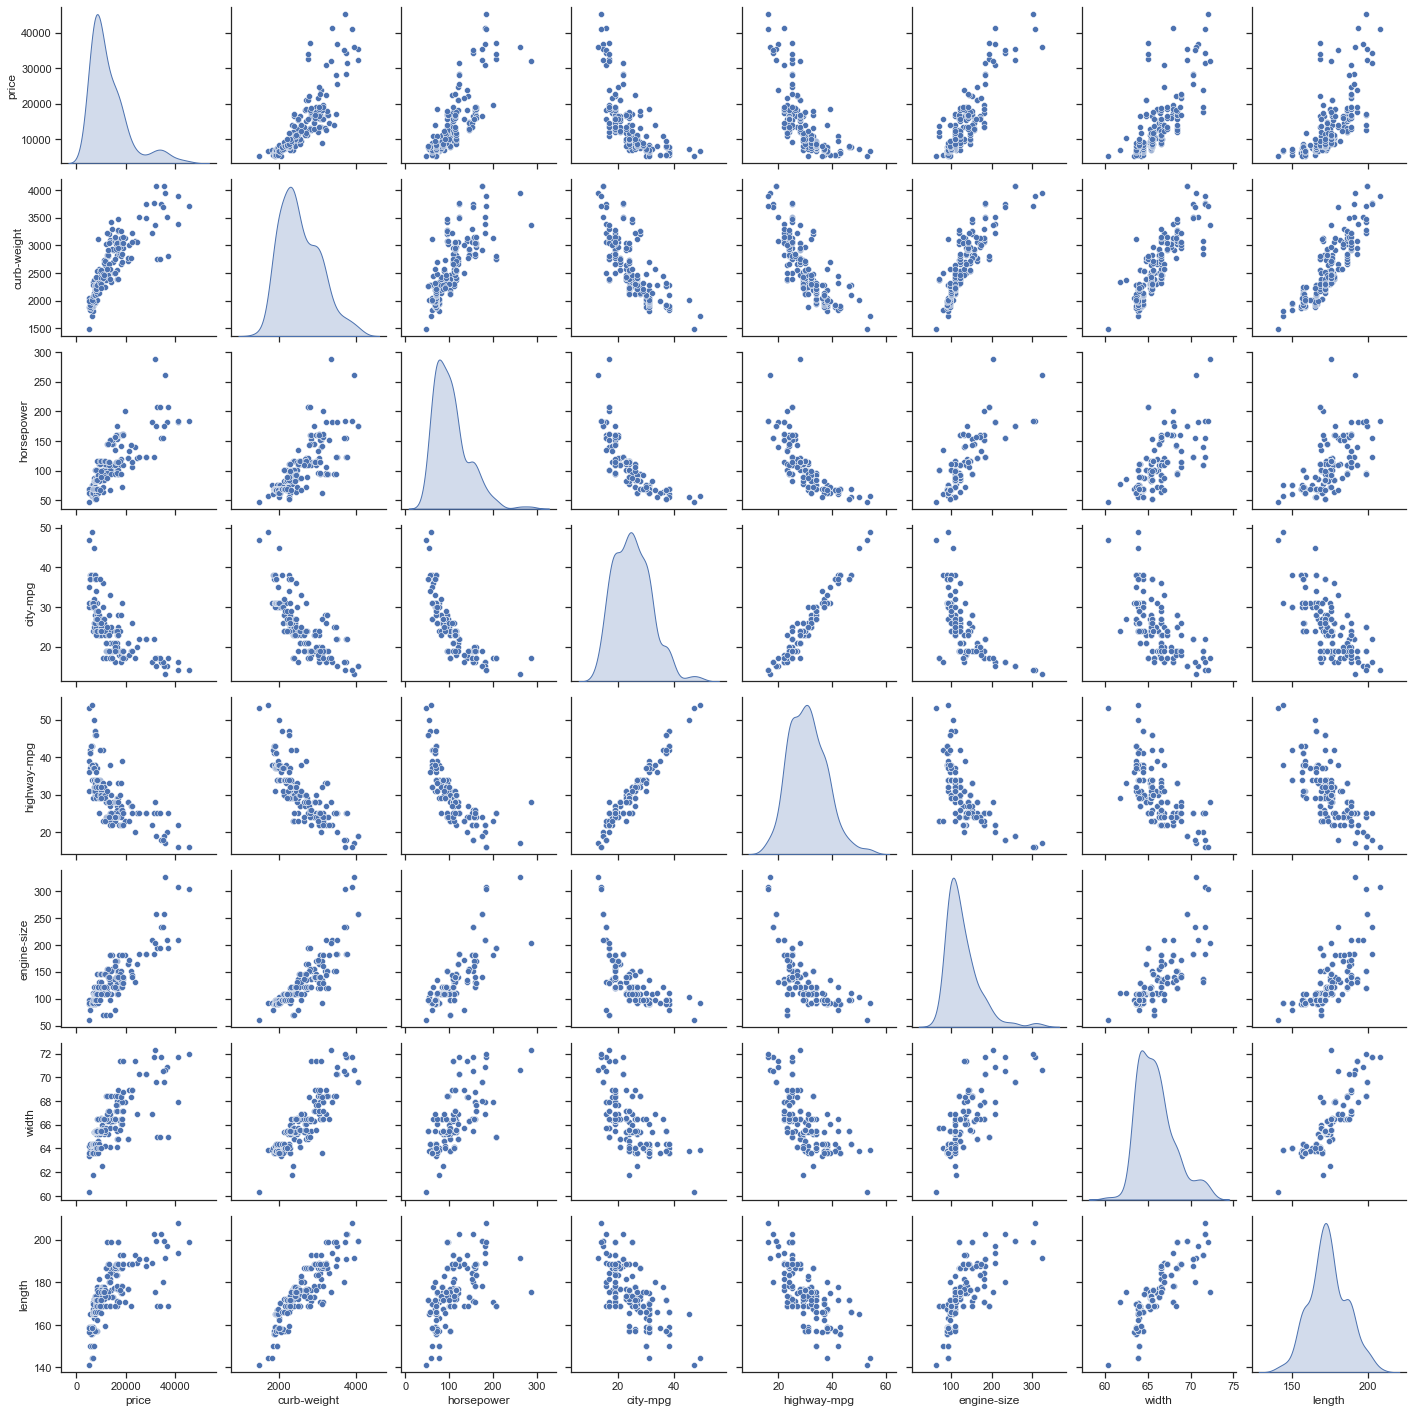

In [36]:
sns.set(font_scale=1.4)
sns.set_theme(style="ticks")
sns.pairplot(df[["price","curb-weight","horsepower","city-mpg","highway-mpg", "engine-size","width","length"]], diag_kind = "kde");

De los diagramas de dispersión, podemos ver unas relaciones fuertes entre las variables *city-mpg* y *highway-mpg*, siendo está de 0.97, y tiene sentido que las millas por galón en ciudad estén relacionadas con las millas por galón en autopista. También se aprecia una relación importante en las variables de *lenght* y *width*, con 0.89, la cual también tiene lógica, ya que un carro entre mayor sea su largo, muy probablemente su ancho también lo sea.

Realizamos ahora los graficos de precio frente a las variables catgoricas, algunas de ellas para analizar el comportamiento del precio y si este se modifica con ciertas cualidades de los vehiculos 

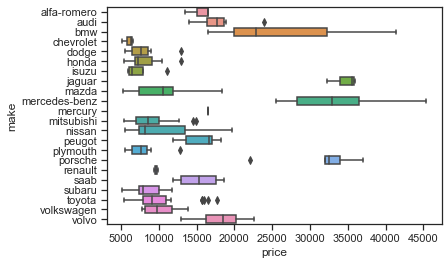

In [37]:
#Price vs fabricante
sns.set(font_scale=1.4)
sns.set_theme(style="ticks")
sns.boxplot(y="make", x = "price", data = df, orient="h");

Como se vio en el análisis de los datos extremos de *price*, la marca influye en el valor, se aprecian valores altos de precio en marcas como Porsche, Mercedes Benz, BMW, Jaguar y algunos modelos de Audi. En contraparte, en las marcas con precios bajos encontramos la Chevrolet, Dodge, Plymouth, Honda e Isuzu.

Veamos cómo se distribuyen los vehículos en cantidad por cada uno de los fabricantes en el dataset

<AxesSubplot:>

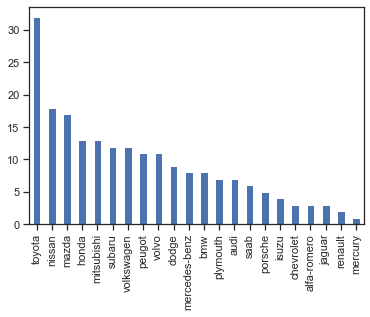

In [38]:
df['make'].value_counts().plot(kind='bar')

Como se puede observar, la mayor cantidad de registros corresponde a autos de la marca Toyota, Nissan y Mazda, mientras que los de menor cantidad son Mercury, Renault y Alfa-Romeo. Ahora miremos como es el comportamiento de precio frente al estilo del vehículo.

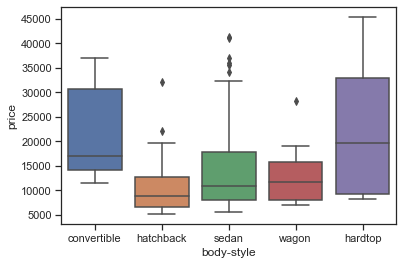

In [39]:
#Price vs body-style
sns.set(font_scale=1.4)
sns.set_theme(style="ticks")
sns.boxplot(x="body-style", y = "price", data = df, orient="v");

El precio de los autos convertibles se muestra mayor al resto de tipos de vehículos, aunque el tipo Hardtop o techo rígido presenta algunos valores altos de precio.

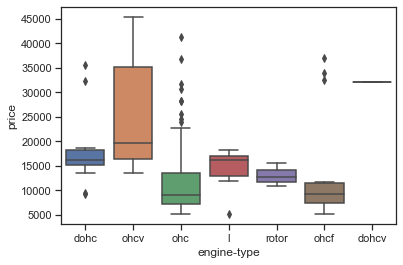

In [40]:
#Price vs tipo de motor
sns.set(font_scale=1.4)
sns.set_theme(style="ticks")
sns.boxplot(x="engine-type", y = "price", data = df, orient="v");

Los motores de tipo ohcv y dohcv ( de doble árbol de leva) presentan precios mayores a los demás tipos de motor. Los motores de tipo ohcf presentan los menores precios.

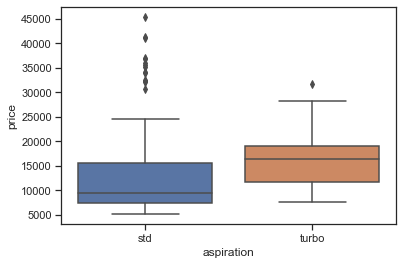

In [41]:
#Price vs aspiration
sns.set(font_scale=1.4)
sns.set_theme(style="ticks")
sns.boxplot(x="aspiration", y = "price", data = df, orient="v");

Los modelos turbo aspirados tienen en general mayor precio

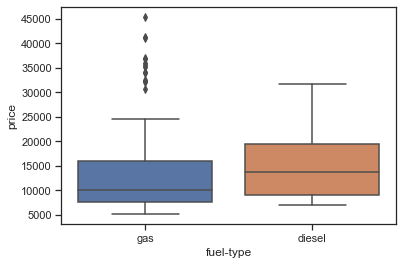

In [42]:
#Price vs tipo combustible
sns.set(font_scale=1.4)
sns.set_theme(style="ticks")
sns.boxplot(x="fuel-type", y = "price", data = df, orient="v");

Los motores diesel presentan un valor superior a los motores de gasolina común, aunque hay una cantidad importante de valores atípicos en vehículos con gasolina corriente, correspondientes a autos de fabricantes de alta gama que potencian sus motores con gasolina.

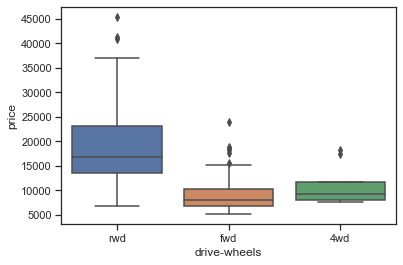

In [43]:
#Price vs drive-wheels (traccion de las ruedas)
sns.set(font_scale=1.4)
sns.set_theme(style="ticks")
sns.boxplot(x="drive-wheels", y = "price", data = df, orient="v");

Los autos con tracción trasera presentan precios mayores en comparacion con las tracciones delanteras y de 4x4.

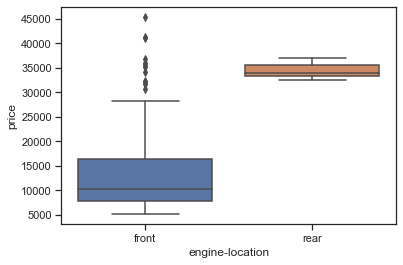

In [44]:
#Price vs localizacion del motor
sns.set(font_scale=1.4)
sns.set_theme(style="ticks")
sns.boxplot(x="engine-location", y = "price", data = df, orient="v");

Los autos con el motor en la parte posterior tienen un precio mayor en comparación con los autos de motor delantero. Esto tiene sentido ya que los autos deportivos poseen el motor en la parte trasera para ofrecer mejor estabilidad al automóvil.

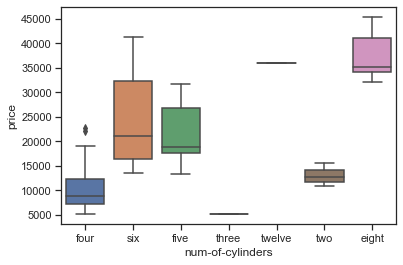

In [45]:
#Price vs número cilindros
sns.set(font_scale=1.4)
sns.set_theme(style="ticks")
sns.boxplot(x="num-of-cylinders", y = "price", data = df, orient="v");

Claramente se aprecia una relacion de a mayor cantidad de cilindros, mayor precio, esto por el aumento de la potencia del motor.

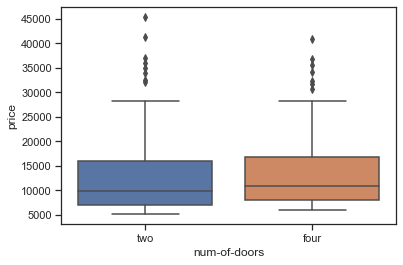

In [46]:
#Price vs número puertas
sns.set(font_scale=1.2)
sns.set_theme(style="ticks")
sns.boxplot(x="num-of-doors", y = "price", data = df, orient="v");

El número de puertas no afecta el valor del vehiculo

<a id='#ML'></a>
### 6. Machine Learning para agrupar en categorias los automóviles

En esta sección se procede a construir el modelo de clustering para las variables del dataset, que permita clasificar los vehículos según sus características. Procedemos a preparar los datos para realizar el modelo planteado

In [47]:
#Preparacion de los datos: particionamos los datos en variables numericas en un conjunto y las categoricas en otro

str_list=[] # lista con las variables categoricas
for colname,colvalue in df.iteritems():
    if type(colvalue[1])== str:
        str_list.append(colname)
  # obtenemos las numericas por defecto
num_list=df.columns.difference(str_list)

#Extraemos las variables numericas del dataset original
num=df[num_list]
#la renombramos como X para facilidad de manejo del dataset
X=num
X.shape

(205, 14)

Debido a que se observó que las variables poseen distintas escalas, además de que no cumplen la normalidad, procedemos a hacer un escalamiento de las variables usando el escalamiento normalizado, con el objetivo de evitar que las variables con escalas grandes (por ejemplo precio), tengan mayor peso en el modelo de cluster. Ademas de esto, como son muchas las variables numéricas del dataset (14 en total) y poseen correlaciones entre sí, se propone realizar una reducción de dimensionalidad usando un Análisis de Componentes Principales (PCA en inglés), para facilitar el trabajo de clasificación para el algoritmo. Este procedimiento consiste en agrupar los componentes según su correlación o covarianza para que se puedan reducir las dimensiones que son redundantes perdiendo la menor variabilidad posible en el proceso, de manera que el resultado final arroje unos resultados muy similares al que darían el conjunto de todas las dimensiones con la ventaja de ser mucho más sencillo de procesar por parte de los algoritmos de clusterización empleados.

In [48]:
#cargamos el metoodo de escalamiento, en este caso el escalamiento normalizado
from sklearn.preprocessing import StandardScaler

X_std = StandardScaler().fit_transform(X)


#Realizamos la reducción de dimensiones usando el PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=10)
principalComponents = pca.fit_transform(X_std)
print(pca.explained_variance_ratio_.sum()) # vemos la variabilidad explicada por las 10 componentes ajustadas

# Guardamos las componentes en un dataframe
PCA_components = pd.DataFrame(principalComponents)

0.9839309560762749


El resultado muestra que la variabilidad que recogen 10 componentes del PCA, explican el 98% de la variabilidad entre las variables, ahora se escogen las componentes que abarcan la mayor variabilidad usando los gráficos de varianza por componente y el acumulado

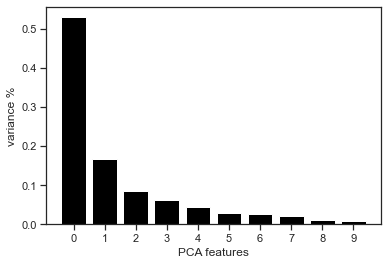

In [49]:
# Graficamos la variabilidad explicada por cada componente
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features);

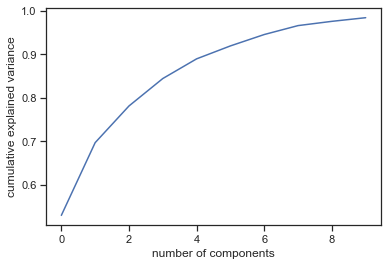

In [50]:
# Graficamos la variabilidad acumulada por cada componente
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Dado que se sugiere trabajar con las componentes que por lo menos acumulen el 80% de la variabilidad total de los datos, se opta por usar las tres primeras componentes, las cuales acumulan cerca del 85% de la variabilidad.

Para efectos de este analisis, se grafican las dos primeras componentes y apreciar su comportamiento.

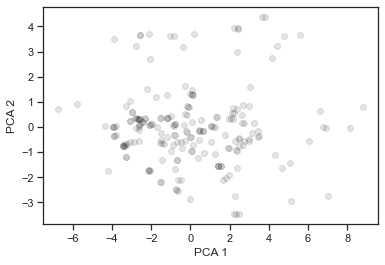

In [51]:
# grafico componentes 1 y 2
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2');

Se observa que estas componentes muestran un comportamiento totalmente aleatorio en los puntos, mostrando la ortogonalidad de los dos vectores.

Ahora vamos a realizar los clusters usando las 3 primeras componentes del PCA. Para encontrar el numero óptimo de clusters, usaremos el método del codo, el cual, basado en la variabilidad intraclusters, permite definir la cantidad optima de conglomerados a trabajar, para eso usaremos la libreria **kneed** de Python.

Optimal number of clusters 3


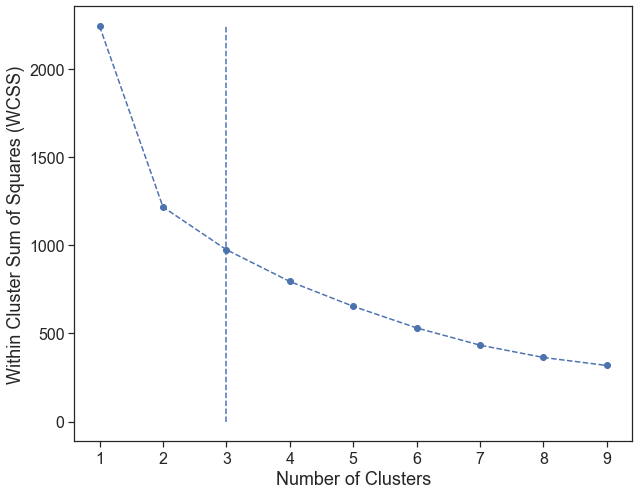

In [52]:
from kneed import KneeLocator
from sklearn.cluster import KMeans

wcss = []
max_clusters = 10
for i in range(1, max_clusters):
    kmeans_pca = KMeans(i, init='k-means++', random_state=42)
    kmeans_pca.fit(PCA_components.iloc[:,:3])
    wcss.append(kmeans_pca.inertia_)

# Encontramos el codo y numero optimo de clusters
n_clusters = KneeLocator([i for i in range(1, max_clusters)], wcss, curve='convex', direction='decreasing').knee
print("Optimal number of clusters", n_clusters)
    
# Visualizamos el grafico ubicando el codo o numero optimo de clusters
fig = plt.figure(figsize=(10,8))
plt.plot(range(1, 10), wcss, marker='o', linestyle='--')
plt.vlines(n_clusters, ymin=0, ymax=max(wcss), linestyles='dashed')
plt.xlabel('Number of Clusters', fontsize=18)
plt.ylabel('Within Cluster Sum of Squares (WCSS)', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

Al hacer uso del metodo del codo, encontramos tres clusters optimos para nuestro dataset, procedemos entonces a construir el modelo

In [53]:
kmeans_pca = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
kmeans_pca.fit(PCA_components.iloc[:,:3])

# anadimos los cluster al dataset
df['Cluster'] = kmeans_pca.labels_

In [54]:
df.head(3)

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,...,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,Cluster
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,...,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0,0
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,...,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0,0
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,...,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0,0


In [55]:
# Guardamos el modelo PCA para el modelo
import pickle as pk

pk.dump(pca, open("pca.pkl","wb"))

# Guardamos el modelo de kmedias para su posterior uso
pk.dump(kmeans_pca, open("kmeans.pkl", "wb"))

Ya tenemos el conjunto de datos con la clasificación de los clusters, por lo que procedemos a describirlos usando las demás variables del dataframe

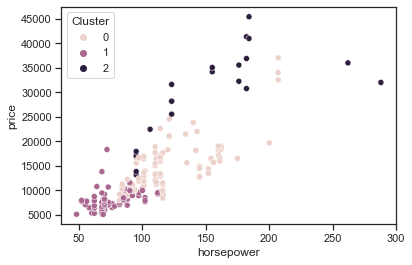

In [56]:
sns.set(font_scale=1.4)
sns.set_theme(style="ticks")
sns.scatterplot(x="horsepower", y = "price", data = df, hue = "Cluster");

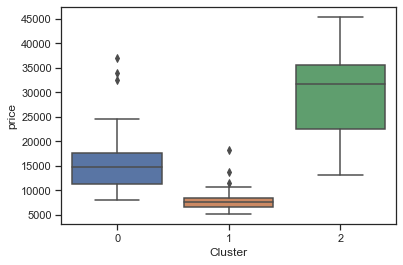

In [57]:
sns.set(font_scale=1.4)
sns.set_theme(style="ticks")
a = sns.boxplot(x="Cluster", y = "price", data = df)

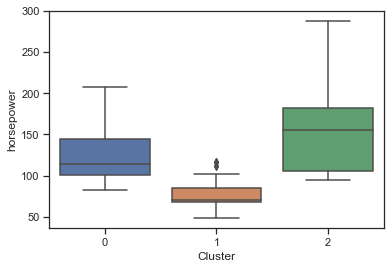

In [58]:
sns.set(font_scale=1.4)
sns.set_theme(style="ticks")
b = sns.boxplot(x="Cluster", y = "horsepower", data = df);

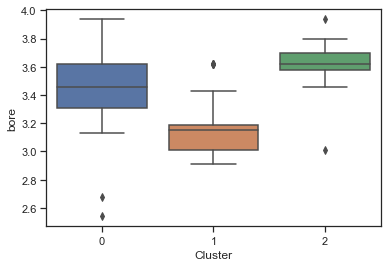

In [59]:
sns.set(font_scale=1.4)
sns.set_theme(style="ticks")
sns.boxplot(x="Cluster", y = "bore", data = df);

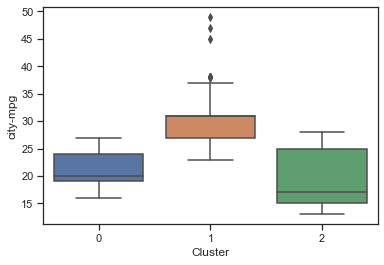

In [60]:
sns.set(font_scale=1.4)
sns.set_theme(style="ticks")
sns.boxplot(x="Cluster", y = "city-mpg", data = df);

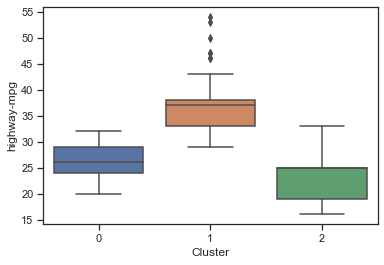

In [61]:
sns.set(font_scale=1.4)
sns.set_theme(style="ticks")
sns.boxplot(x="Cluster", y = "highway-mpg", data = df);

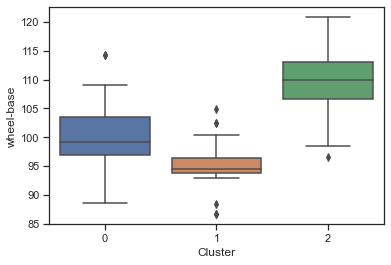

In [62]:
sns.set(font_scale=1.4)
sns.set_theme(style="ticks")
sns.boxplot(x="Cluster", y = "wheel-base", data = df);

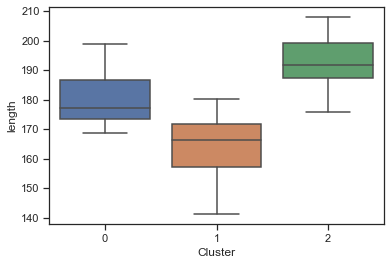

In [63]:
sns.set(font_scale=1.4)
sns.set_theme(style="ticks")
sns.boxplot(x="Cluster", y = "length", data = df);

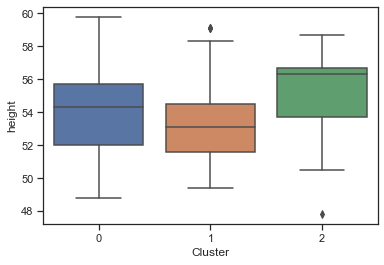

In [64]:
sns.set(font_scale=1.4)
sns.set_theme(style="ticks")
sns.boxplot(x="Cluster", y = "height", data = df);

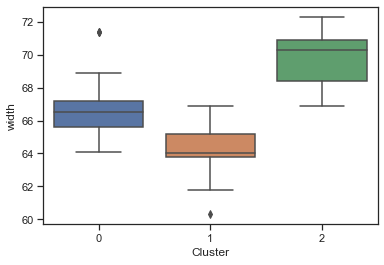

In [65]:
sns.set(font_scale=1.4)
sns.set_theme(style="ticks")
sns.boxplot(x="Cluster", y = "width", data = df);

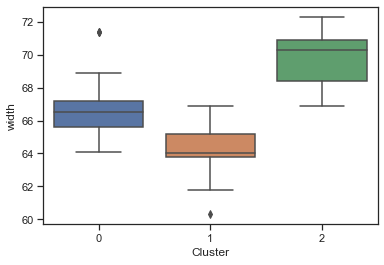

In [66]:
sns.set(font_scale=1.4)
sns.set_theme(style="ticks")
sns.boxplot(x="Cluster", y = "width", data = df);

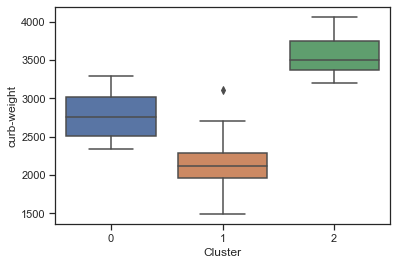

In [67]:
sns.set(font_scale=1.4)
sns.set_theme(style="ticks")
sns.boxplot(x="Cluster", y = "curb-weight", data = df);

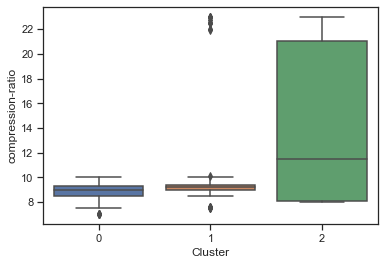

In [68]:
sns.set(font_scale=1.4)
sns.set_theme(style="ticks")
sns.boxplot(x="Cluster", y = "compression-ratio", data = df);

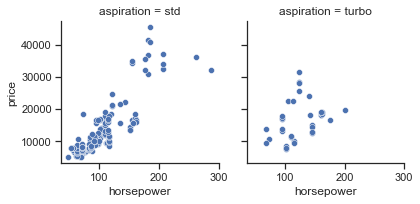

In [69]:
#sns.set(font_scale=1.4)
#sns.set_theme(style="ticks")
g = sns.FacetGrid(col='aspiration',data=df,legend_out=False)
g.map(sns.scatterplot,'horsepower','price')

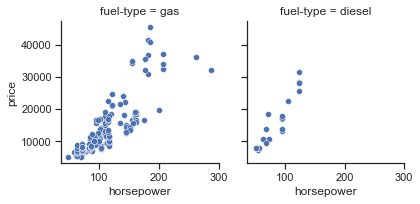

In [70]:
sns.set(font_scale=1.4)
sns.set_theme(style="ticks")
g = sns.FacetGrid(col='fuel-type',data=df,legend_out=False)
g.map(sns.scatterplot,'horsepower','price')

Según lo observado en los gráficos, podríamos concluir entonces sobre los tres grupos de automóviles en tres categorías, las cuales son:

* **Cluster 0**: Autos de gama media, con precio promedio del mercado y especificaciones de gama intermedia en general.

* **Cluster 1**: Autos baratos o económicos del mercado, con bajas prestaciones y en general de dimensiones pequeñas.

* **Cluster 2**: Autos costosos, con especificaciones de alta, motores más grandes y mayor tamaño en general.

#### Predicción de nuevos elementos

Ahora se proponer clasificar nuevos automóviles según sus especificaciones en alguno de los clusters, usando el modelo ya construido

In [71]:
#Cargue de datos nuevos
df_new = pd.read_csv('automobile_nuevo.csv', sep = ';')
df_new.head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430
1,peugot,gas,std,four,sedan,rwd,front,107.9,186.7,68.4,...,120,mpfi,3.46,3.19,8.4,97,5000,19,24,16630
2,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,145,idi,3.01,3.40,23.0,132,4600,26,27,22470


In [72]:
# extraemos solo las variables numericas del nuevo grupo de datos
X_new=df_new[num_list]
X_std_new = StandardScaler().fit_transform(X_new)

In [73]:
#Cargamos y aplicamos los modelos de PCA y de Kmedias realizados anteriormente

# PCA
pca_reload = pk.load(open("pca.pkl",'rb'))
pca_new = pca_reload.transform(X_std_new)
pca_new_df = pd.DataFrame(pca_new)

# Kmedias
kmeans = pk.load(open("kmeans.pkl", "rb"))
kmeans_new = kmeans.predict(pca_new_df.iloc[:,:3])

# anadimos los clusters nuevos al dataset
df_new['Cluster'] = kmeans_new

In [74]:
df_new

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,Cluster
0,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,...,mpfi,3.50,2.80,8.8,101,5800,23,29,16430,1
1,peugot,gas,std,four,sedan,rwd,front,107.9,186.7,68.4,...,mpfi,3.46,3.19,8.4,97,5000,19,24,16630,0
2,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,idi,3.01,3.40,23.0,132,4600,26,27,22470,0


Los nuevos autos aparecen clasificados en el cluster 1 el primero y los dos restantes en el cluster 0, indicando que son vehículos de gama media el primero y los otros dos son autos de gama baja o con prestaciones de rango bajo.

<a id='#conclusion'></a>
### 7. Conclusión

Como se observa en el análisis realizado, se ha realizado un análisis del dataset, primero realizando una limpieza de las variables, realizando un detalle de los datos atípicos del dataset , los cuales al final se han decidido mantener estos registros, dado que parecían normales dadas las variables en las que aparecieron estas observaciones anómalas.

Con respecto a los resultados de las pruebas estadísticas, se encontró que las variables continuas evaluadas no presentaron una distribución normal en su mayoría. Respecto a los contrastes de hipótesis establecidos, pudimos ver que no hubo diferencia significativa en las dos preguntas de investigación realizadas, las cuales arrojaron que no existe una diferencia en el tamaño de los motores turbo aspirados frente al tamaño de los motores aspirados convencionalmente; este resultado también se reflejó en el contraste realizado para la potencia de los motores que usan combustible diesel frente a la potencia de los motores que usan gasolina, donde no se encontró diferencias estadísticamente significativas. 

En la visualización de datos se pudo ver el resultado de las pruebas estadísticas y conocer más información mediante gráficos de correlación que permitían observar la relación entre características de los vehículos tales como su longitud y anchura, kilometraje por ciudad y caballos, tamaño de las ruedas y dimensiones del vehículo, etc. 

Al final, se ha construido un modelo de agrupación con el dataset, para encontrar segmentos de autos que pudiesen servir en un momento dado para establecer gamas de vehículos para los clientes en un concesionario o incluso para el cliente poder conocer, de acuerdo a sus necesidades, cual es el segmento de vehículo que mejor se adapta a su necesidad puntual al momento de adquirir uno. Se evidencio además que para poder construir el modelo, se tuvo que realizar una serie de transformaciones en los datos, como una estandarización (para evitar que variables con escalas grandes afectaran el modelo) y un análisis de componentes principales, los cuales fueron importantes para obtener un modelo más consistente, el cual produce resultados interesantes y que permite clasificar nuevos autos, como lo vimos en el caso de la predicción, entregando el resultado de manera sencilla y eficiente, lo cual sería muy útil a futuro para un distribuidor de vehículos poder segmentarlos usando este tipo de modelos, basado en las especificaciones de los vehículos.

### ENLACE AL GITHUB

https://github.com/JhonHarry/automobile_data_kaggle_limpieza

### Contribuciones de los integrantes del grupo en la práctica

| **Contribuciones**                                                             | **Firma**  |
| ------------------------------------------------------------------------------ | ---------- |
| **Investigación acerca de la viabilidad del dataset para la práctica**         | JHLG, PJSV |
| **Redacción de las respuestas del documento final en markdown y conclusiones** | JHLG, PJSV |
| **Desarrollo código en Python - Jupyter Notebook, dataset final**              | JHLG, PJSV |

### Recursos y Bibliografía 

* Calvo M, Subirats L, Pérez D (2019). Introducción a la limpieza y análisis de los datos. Editorial UOC.
* Wes McKinney (2012). Python for Data Analysis. O’Reilley Media, Inc.
* Gibergans J (2018). Contraste de varianzas. Editorial UOC.
* Rovira C (2018). Contraste de hipótesis. Editorial UOC.
* Srinivasan R (2017) Kaggle. Dataset de Automobile: 
https://www.kaggle.com/toramky/automobile-dataset